<a href="https://colab.research.google.com/github/udithac/udithac/blob/main/SentimentAnalyzerAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries from Keras for text processing.
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Import specific modules for building a sequential neural network.
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, SimpleRNN, Embedding, Flatten


In [2]:
# Import necessary libraries for numerical operations and data manipulation.
import numpy as np
import pandas as pd


In [3]:
#data path c:\data\nlp-sample




In [4]:
#. First I need to upload my csv file that has all the data into the Google Colab Environment
#1. Train data set
from google.colab import files

#upload
train_ds_upload = files.upload() # this will prompt me to upload my csv into my Google Colab environment.

Saving train.csv to train.csv


In [5]:
#Read the Train file nae in to a Pandas Data Frame
train_uploaded_file_name=next(iter(train_ds_upload))

train_df = pd.read_csv(train_uploaded_file_name,
                 encoding = "latin1",
                   engine = "python",
                   header = 0)

#display the header of the imported datafram/ file
train_df.head(-5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27471,15bb120f57,"i`m defying gravity. and nobody in alll of oz,...","i`m defying gravity. and nobody in alll of oz,...",neutral,morning,46-60,France,65273511,547557.0,119
27472,8f5adc47ec,http://twitpic.com/663vr - Wanted to visit the...,were too late,negative,noon,60-70,Gabon,2225734,257670.0,9
27473,a208770a32,in spoke to you yesterday and u didnt respond...,in spoke to you yesterday and u didnt respond ...,neutral,night,70-100,Gambia,2416668,10120.0,239
27474,8f14bb2715,So I get up early and I feel good about the da...,I feel good ab,positive,morning,0-20,Georgia,3989167,69490.0,57


In [6]:
train_df.shape

(27481, 10)

In [7]:
train_df.columns.to_list()

['textID',
 'text',
 'selected_text',
 'sentiment',
 'Time of Tweet',
 'Age of User',
 'Country',
 'Population -2020',
 'Land Area (Km²)',
 'Density (P/Km²)']

In [8]:
#2. Validation data set
from google.colab import files

#upload
validation_ds_upload = files.upload() # this will prompt me to upload my csv into my Google Colab environment.

Saving test.csv to test.csv


In [9]:
#Read the Validation file nae in to a Pandas Data Frame
validation_uploaded_file_name=next(iter(validation_ds_upload))

validation_df = pd.read_csv(validation_uploaded_file_name,
                 encoding = "latin1",
                   engine = "python",
                   header = 0)

#display the header of the imported datafram/ file
validation_df.head(-5)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
validation_df.shape

(4815, 9)

In [11]:
validation_df.columns.to_list()

['textID',
 'text',
 'sentiment',
 'Time of Tweet',
 'Age of User',
 'Country',
 'Population -2020',
 'Land Area (Km²)',
 'Density (P/Km²)']

In [12]:
# Fill missing values in the 'text' column of the training DataFrame with an empty string.
train_df['text'].fillna('', inplace=True)

# Fill missing values in the 'text' column of the validation DataFrame with an empty string.
validation_df['text'].fillna('', inplace=True)


In [13]:
# Define a function to map sentiment labels to numerical values.
def func(sentiment):
    if sentiment == 'positive':
        return 0
    elif sentiment == 'negative':
        return 1
    else:
        return 2

# Apply the function to the 'sentiment' column in the training DataFrame.
train_df['sentiment'] = train_df['sentiment'].apply(func)

# Apply the function to the 'sentiment' column in the validation DataFrame.
validation_df['sentiment'] = validation_df['sentiment'].apply(func)


The function to convert sentiment labels ('positive', 'negative', or others) into numerical values (0, 1, or 2), and then we can apply this function to the 'sentiment' column in both the training and validation DataFrames

In [14]:
# Convert the 'text' column in the training DataFrame to a NumPy array.
x_train = np.array(train_df['text'].tolist())

# Convert the 'sentiment' column in the training DataFrame to a NumPy array.
y_train = np.array(train_df['sentiment'].tolist())

# Convert the 'text' column in the validation DataFrame to a NumPy array.
x_test = np.array(validation_df['text'].tolist())

# Convert the 'sentiment' column in the validation DataFrame to a NumPy array.
y_test = np.array(validation_df['sentiment'].tolist())


Converting the 'text' and 'sentiment' columns from the DataFrames into NumPy arrays for both training and testing sets.

In [15]:
x_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [16]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [17]:
# Convert the 'sentiment' labels in the training set to categorical one-hot encoded vectors.
y_train = to_categorical(y_train, 3)

# Convert the 'sentiment' labels in the testing set to categorical one-hot encoded vectors.
y_test = to_categorical(y_test, 3)


using the to_categorical function to converting the sentiment labels (previously converted to numerical values) into categorical one-hot encoded vectors. The 3 in to_categorical(y_train, 3) indicates that we have three classes for sentiment (0, 1, and 2), and the function will create one-hot encoded vectors accordingly.

In [18]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [19]:
# Create a tokenizer object with a vocabulary size of 20,000 words.
tokenizer = Tokenizer(num_words=20000)


 using the Tokenizer class to create a tokenizer object, and specifying a vocabulary size of 20,000 words using the num_words parameter. This tokenizer will be used to convert text data into sequences of numerical values.

In [20]:
# Fit the tokenizer on the training text data to build the vocabulary.
tokenizer.fit_on_texts(x_train)

# Fit the same tokenizer on the testing text data to ensure consistent vocabulary mapping.
tokenizer.fit_on_texts(x_test)


using the fit_on_texts method of the tokenizer to build the vocabulary based on the text data from both the training (x_train) and testing (x_test) sets. The goal is to ensure that the tokenizer has consistent mappings for words across both datasets.

In [21]:
# Get the total number of unique words in the tokenizer's vocabulary.
vocab_size = len(tokenizer.word_index)


using the word_index attribute of the tokenizer to obtain a dictionary mapping words to numerical indices, and then find the length of this dictionary to determine the total number of unique words in the vocabulary. The result, stored in vocab_size, represents the size of the vocabulary.

In [22]:
# Convert the training text data into sequences of numerical indices using the tokenizer.
x_train = tokenizer.texts_to_sequences(x_train)

# Convert the testing text data into sequences of numerical indices using the same tokenizer.
x_test = tokenizer.texts_to_sequences(x_test)


In [23]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post', maxlen=35)  # Set maxlen to 35
x_test = pad_sequences(x_test, padding='post', maxlen=35)

Using the texts_to_sequences method of the tokenizer to convert the original text data into sequences of numerical indices. Each element in x_train and x_test will be a sequence of indices representing the words in the corresponding text

In [24]:
x_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

In [25]:
x_train.shape

(27481, 35)

creating the neural network model. The Embedding layer is used to convert numerical indices to dense vectors, the SimpleRNN layer introduces a recurrent layer with 32 units, and the final Dense layer outputs probabilities for each of the three classes using softmax activation. The model.summary() provides an overview of the model's architecture

In [26]:
# Create a sequential neural network model.
model = Sequential()

# Add an embedding layer with a vocabulary size of 20,000, output dimension of 5, and input sequence length of 35.
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))

# Add a Simple RNN layer with 32 units and set return_sequences to False.
model.add(SimpleRNN(32, return_sequences=False))

# Add a Dense layer with 3 output units and softmax activation for multiclass classification.
model.add(Dense(3, activation='softmax'))

# Display a summary of the model architecture.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 5)             100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1216      
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 101315 (395.76 KB)
Trainable params: 101315 (395.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


configuring the training process of the model. Using the Adam optimizer, categorical crossentropy as the loss function (suitable for multiclass classification problems), and accuracy as the metric to monitor during training

In [28]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
859/859 [==============================] - 12s 12ms/step - loss: 0.9629 - accuracy: 0.5205 - val_loss: 0.7397 - val_accuracy: 0.7250
Epoch 2/10
859/859 [==============================] - 10s 11ms/step - loss: 0.7151 - accuracy: 0.6964 - val_loss: 0.6875 - val_accuracy: 0.7460
Epoch 3/10
859/859 [==============================] - 10s 12ms/step - loss: 0.5727 - accuracy: 0.7725 - val_loss: 0.6101 - val_accuracy: 0.7612
Epoch 4/10
859/859 [==============================] - 10s 11ms/step - loss: 0.4821 - accuracy: 0.8184 - val_loss: 0.6463 - val_accuracy: 0.7495
Epoch 5/10
859/859 [==============================] - 9s 10ms/step - loss: 0.4033 - accuracy: 0.8528 - val_loss: 0.6758 - val_accuracy: 0.7485
Epoch 6/10
859/859 [==============================] - 10s 11ms/step - loss: 0.3392 - accuracy: 0.8798 - val_loss: 0.6655 - val_accuracy: 0.7391
Epoch 7/10
859/859 [==============================] - 9s 11ms/step - loss: 0.2940 - accuracy: 0.8979 - val_loss: 0.7661 - val_accuracy: 0

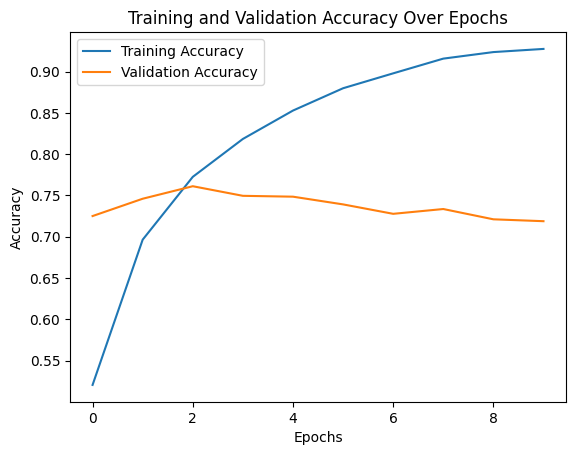

In [29]:
# Plot the training accuracy and validation accuracy over epochs.
import matplotlib.pyplot as plt

# Plot the training accuracy.
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot the validation accuracy.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Adding a legend
plt.legend()

# Display the plot.
plt.show()


Using Matplotlib to create a plot of the training accuracy and validation accuracy over epochs. The history object likely contains the training history, and you are using its 'accuracy' and 'val_accuracy' values to create the plot

In [30]:
# Prediction 1
text = "I love that movie, I need to watch it again!"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")


1/1 [==============================] - 0s 198ms/step
Neutral Sentiment


In [31]:
# Prediction 2

text = "The movie was good, i will recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")


1/1 [==============================] - 0s 28ms/step
Postive Sentiment


In [32]:
# Prediction 3 for vulgar or explicit language words/ comments

text = "Suck!"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 [==============================] - 0s 22ms/step
Negative Sentiment


In [33]:
# Prediction 3 for vulgar or explicit language words/ comments

text = "I don't like your services!"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 [==============================] - 0s 21ms/step
Negative Sentiment


In [42]:
#Let's convert this into a function, then we can apply it easily


def predict_sentiment(text, model, tokenizer, max_len=35):
    """
    Predicts the sentiment of a given text using a trained model.

    Parameters:
    - text (str): The input text for sentiment prediction.
    - model: The trained sentiment analysis model.
    - tokenizer: The tokenizer used for text preprocessing.
    - max_len (int): The maximum length of input sequences (padding length).

    Returns:
    - str: The predicted sentiment ("Positive", "Negative", or "Neutral").
    """
    text = translate_to_english(text)
    # Convert the text to numerical sequences using the tokenizer
    text_seq = tokenizer.texts_to_sequences([text])

    # Pad the sequences to match the model's input length
    text_padded = pad_sequences(text_seq, padding='post', maxlen=max_len)

    # Make predictions using the trained model
    predictions = model.predict(text_padded)

    # Get the index of the predicted sentiment class
    predicted_class_index = predictions.argmax(axis=-1)

    # Map the index to the corresponding sentiment
    prediction = "TEXT: " + str(predicted_class_index[0]) + " - "
    if predicted_class_index[0] == 0:
        prediction += "Positive Sentiment!"
        return "Positive Sentiment"
    elif predicted_class_index[0] == 1:
        prediction += "Negative Sentiment"
        return "Negative Sentiment"
    else:
        prediction += "Neutral Sentiment"
        return "Neutral Sentiment"


In [44]:
#Sample code to translate any language text into english language
from googletrans import Translator

def translate_to_english(text, source_lang='auto', target_lang='en'):
    translator = Translator()
    translation = translator.translate(text, src=source_lang, dest=target_lang)
    return translation.text

# Example usage:
comments = ["Bonjour le monde", "Hola, ¿cómo estás?", "你好世界","اسمي أوديثا","Mein Name ist Uditha","මගේ නම උදිත චන්දන"]

# Translate each comment to English
english_comments = [translate_to_english(comment) for comment in comments]

# Print the translated comments
print(english_comments)


['Hi world', 'Hello how are you?', 'Hello World', 'My name is Odeetha', 'My name is Uditha', 'My name is Uditha Chandana']


In [37]:
# Example usage:

print(predict_sentiment("Der Film war großartig", model, tokenizer))

1/1 [==============================] - 0s 86ms/step
Positive Sentiment


In [43]:
print(predict_sentiment( translate_to_english("schlechte Behandlung"), model, tokenizer))

1/1 [==============================] - 0s 24ms/step
Negative Sentiment


In [49]:
print(predict_sentiment( translate_to_english("I wanna return all my products since your products are no soo gut"), model, tokenizer))

1/1 [==============================] - 0s 21ms/step
Negative Sentiment
